# 1 - Introdução
Os participantes do grupo são:
- Felipe Kleine - 5992514
- Gabriel Brandão - 10737182
- Guilherme Simões - 10758748
- Isaac Bergerman - 10337575
- Jiang Zhi - 9778706
- Ricardo Felix - 13797118

O link do Google Drive é https://drive.google.com/drive/folders/10eByLk4JH07dS5MFJV7H4jAr338w6pIV?usp=sharing, o link do Git é 
https://github.com/FelipeKleine/EP-MAC0417_5768-2022.

Nessa parte do EP foi feito a normalizações e algumas funções de análise de cada classe.

# 2 - Normalização

Vamos realizar a normalização das imagens de cada classe do augmentedDataSet. Deve-se usar a equalização de histogramas como função inicial de normalização, gerando um normalizedDataset. 


In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, io, img_as_float
from skimage import exposure # Biblioteca de equalização de histograma - https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

from google.colab import drive, files

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/EP-MAC0417-MAC5768-2022/')

"""
  Essa função mostra a imagem em preto e branco.
"""
def show(image):
  plt.figure()
  plt.imshow(image, cmap=plt.cm.gray) 
  plt.show() 

"""
  Essa função faz a equalização do histograma
"""
def equalize_image(image):
  image_equalized = exposure.equalize_hist(image)
  return image_equalized



def normalize_dataset():
  classes = ["Caneca", "Controle", "Garfo", "Garrafa", "Headset", "Lapis", "Livro", "Oculos", "Perfume", "Sapato"]
  classes = ["Sapato"]

  # Verifica se a pasta existe, antes de fazer a normalização
  if not os.path.exists(f"dataset/normalized/"):
      os.makedirs(f"dataset/normalized/")
  
  for object_class in classes:
    directory = f"dataset/augmented/{object_class}"
    if not os.path.exists(f"dataset/normalized/{object_class}"):
      os.makedirs(f"dataset/normalized/{object_class}")

    if not os.path.exists(directory):
      continue

    images = []

    for filename in os.listdir(directory):
      full_path = os.path.join(directory, filename)
      # Verifica se eh arquivo
      if os.path.isfile(full_path):
        broken = full_path.split('/')
        new_path = f"dataset/normalized/{broken[2]}/{broken[3]}"
        image = io.imread(full_path)
        image = equalize_image(image)
        images.append(image)
        #image_new = np.array(image, dtype=np.uint8)
        io.imsave(new_path, image)




    
if __name__ == "__main__":
  if not os.path.exists(f"dataset/normalized/"):
    normalize_dataset()





# 3 - Funções de análise de cada classe
As funções de análise de cada classe abaixo devem ser aplicadas ao
originalGrayDataset, augmentedDataset e normalizedDataset. 

Assim, precisamos calcular e mostrar para cada dataset:

- Protótipo médio de cada classe (exemplo Figura 4).

- Histograma médio de cada classe.

- Variância do histograma de cada classe.

Calculando grayDataset


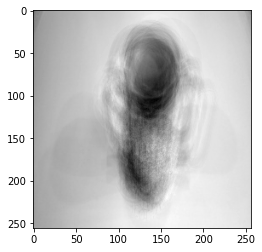

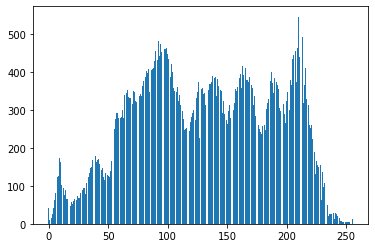

Total variance 57.210656950645564


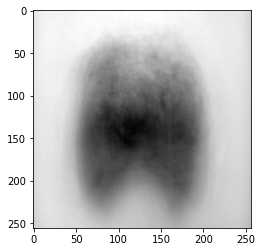

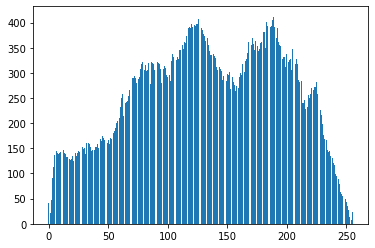

Total variance 61.26243433224089


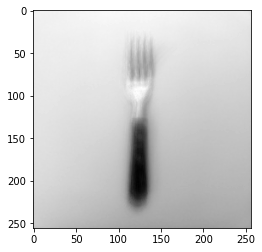

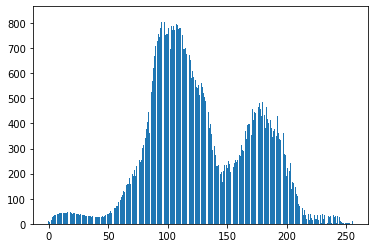

Total variance 43.13029639721397


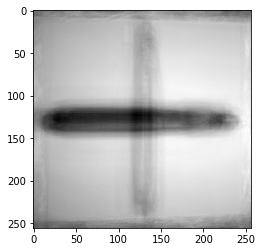

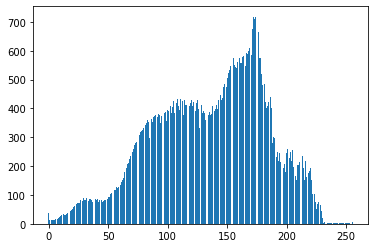

Total variance 47.200310111347775


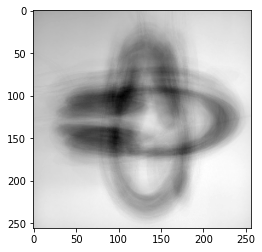

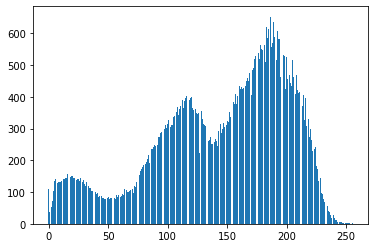

Total variance 57.08527770591451


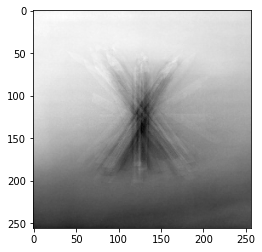

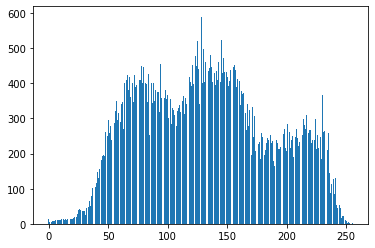

Total variance 54.56800506705815


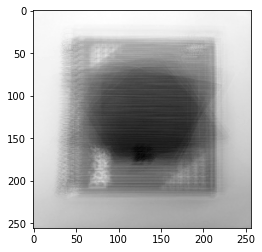

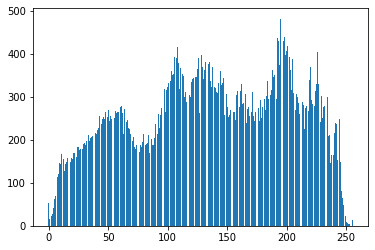

Total variance 64.64474115271302


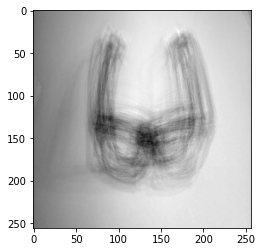

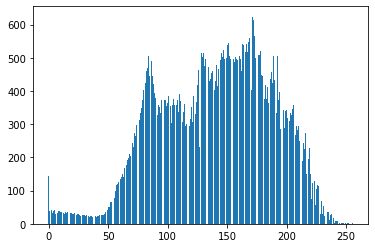

Total variance 47.22746494877029


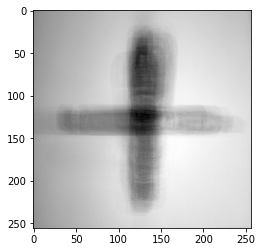

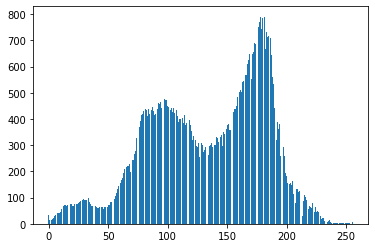

Total variance 48.44284202142434


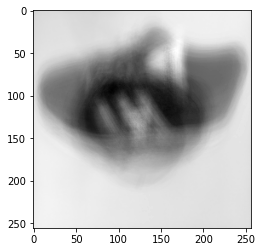

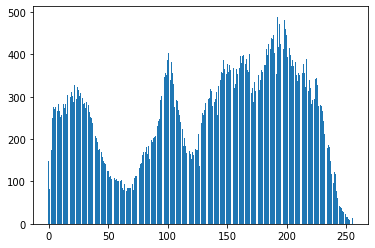

Total variance 68.95028125570587
Calculando augmentedDataset


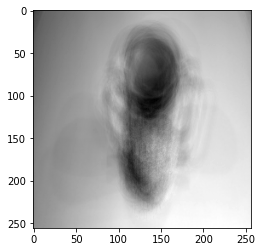

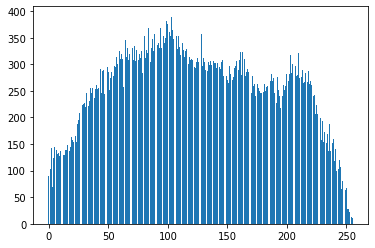

Total variance 64.12809264489717


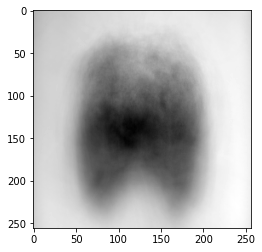

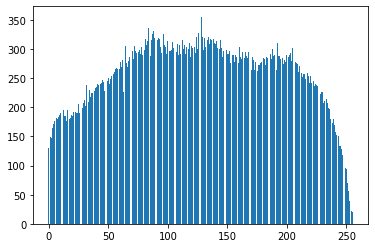

Total variance 66.46393049661998


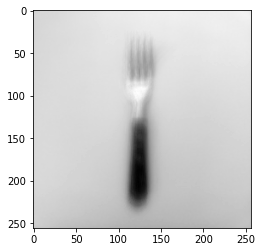

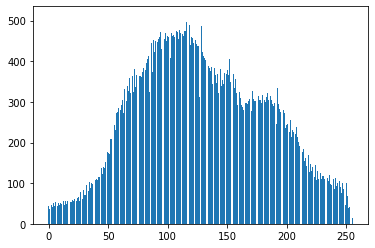

Total variance 54.16749220427966


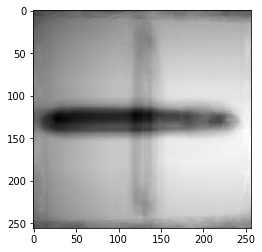

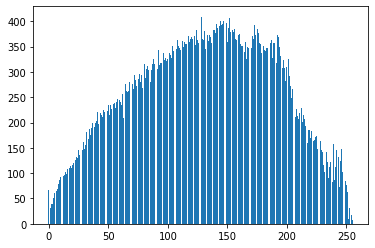

Total variance 59.01160227430825


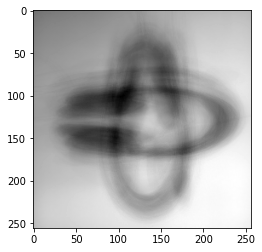

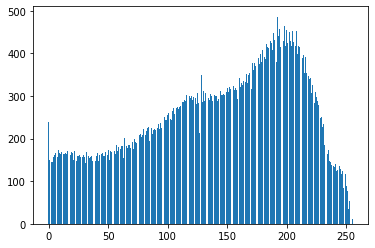

Total variance 65.30203744391817


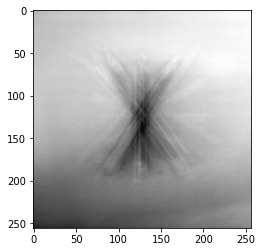

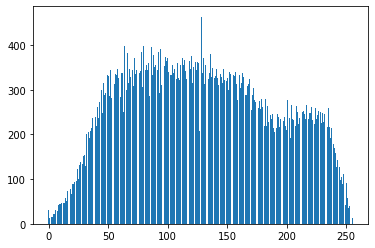

Total variance 61.09866006703686


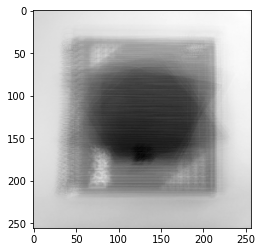

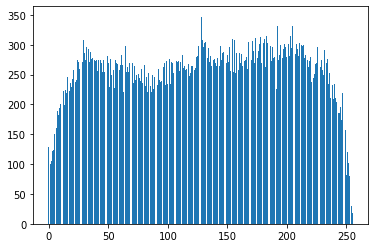

Total variance 70.07443010173277


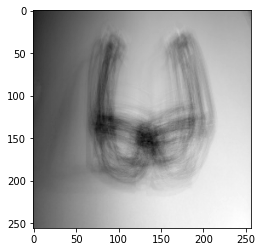

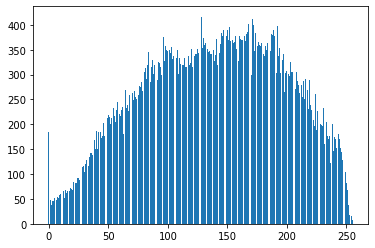

Total variance 59.51600404925723


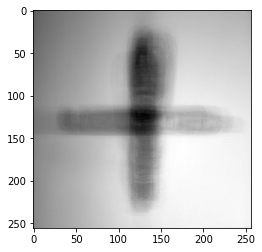

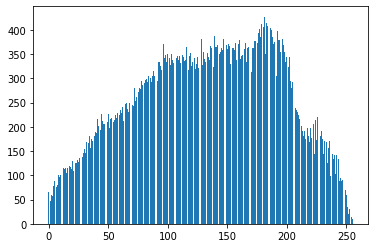

Total variance 59.92742368656308


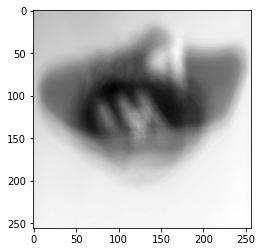

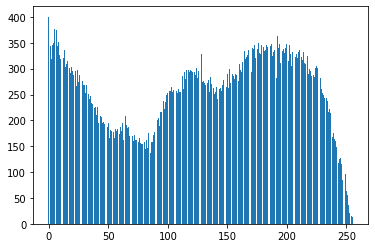

Total variance 72.45502709754707
Calculando normalizedDataset


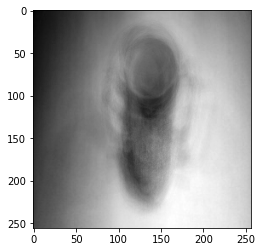

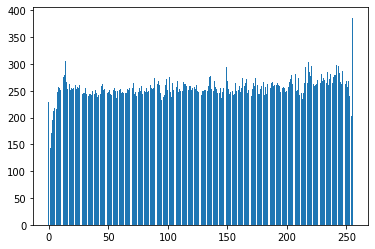

Total variance 73.98803850364536


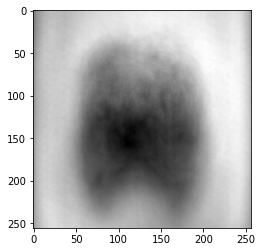

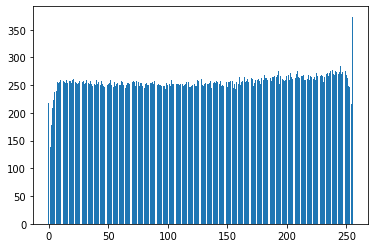

Total variance 74.00605806382342


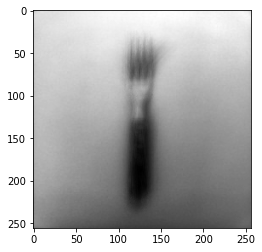

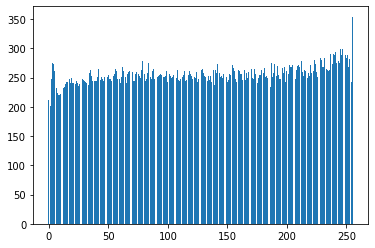

Total variance 74.14828618638433


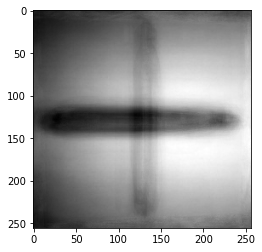

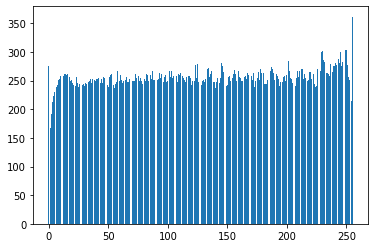

Total variance 74.04753336565432


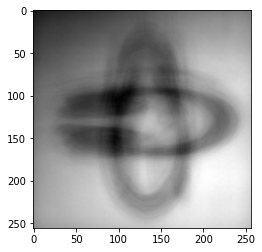

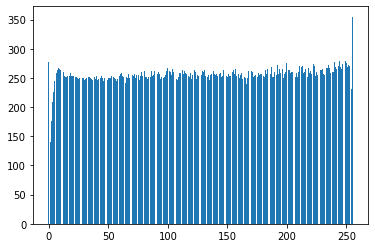

Total variance 73.95873478440012


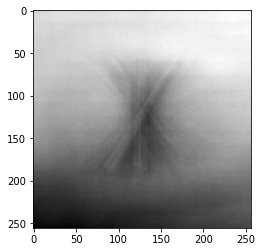

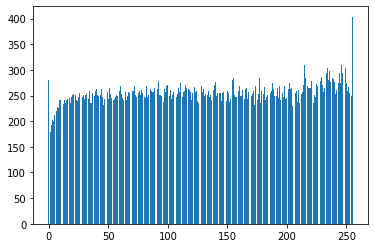

Total variance 73.96522901390692


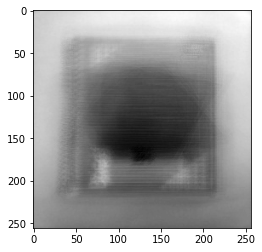

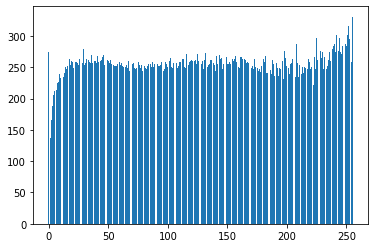

Total variance 73.9302084344719


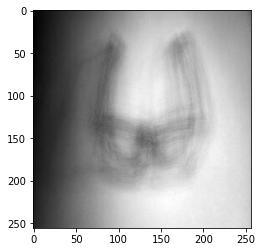

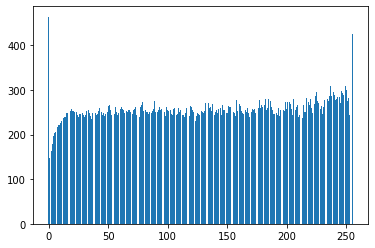

Total variance 74.16395590686022


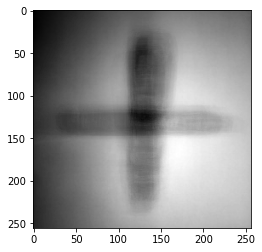

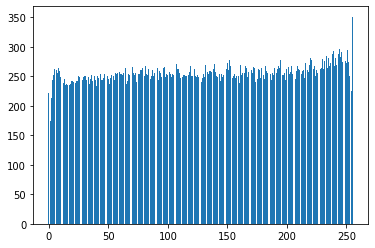

Total variance 74.03339062348611


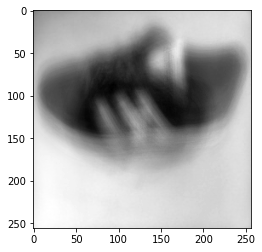

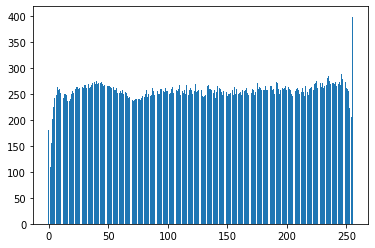

Total variance 73.87786954757124


In [3]:
"""
  Calcula o protótipo médio de cada classe
"""
def average_image(images):
  if len(images) == 0:
    return np.zeros((1, 1))
  n, m = images[0].shape                       # Acha o tamanho de n e m.
  mean = np.zeros((n, m))                      # Cria o valor da media com os valores zerados.

  for image in images:                         # Itera nas imagens
    mean += np.array(image, dtype=np.float64)  # Soma o valor de cada imagem na media, fazendo inicialmente a conversao para float

  mean /= float(len(images))                   # Divide pela quantidade de imagens.
  return mean
  #image = np.array(mean, dtype=np.uint8)      # Transforma para imagem em 255.
  #return image


# Pegar a média dos histogramas de cada classe.
## Pegar o histograma
## Usa o exposure https://scikit-image.org/docs/stable/api/skimage.exposure.html
"""
  Calcula a média de histograma para cada classe.
"""

def mean_histogram(images, show=False):
  ## Precisa transforma em gray primeiro
  ## It an 2D array
  histogram_mean = np.zeros(256)
  for image in images:
    histogram_mean += np.array(exposure.histogram(img_as_float(image))[0], dtype = np.float64)
  histogram_mean /= float(len(images))


  #ax = plt.hist(histogram_mean, bins = 256)
  if show == True:
    plt.bar(range(0, 256, 1), histogram_mean)
    plt.show()



  return histogram_mean


# A solução foi baseada em https://math.stackexchange.com/questions/857566/how-to-get-the-standard-deviation-of-a-given-histogram-image na solução da terceira resposta
def variance_histogram(images):
  hist = mean_histogram(images)
  n = len(hist)
  sum = 0
  prod = 0
  sqsum = 0
  counter = 0
  for y in hist:
    sum += y
    prod += counter*y
    counter += 1
  mean = prod/sum
  counter = 0
  for y in hist:
    dx = counter-mean
    sqsum += y*dx*dx
    counter += 1
  # sigma^2
  variance = sqsum/sum                 # variance
  stdv = math.sqrt(variance)           # standard deviation
  return stdv

def gray_calculation():
  print("Calculando grayDataset")
  classes = ["Caneca", "Controle", "Garfo", "Garrafa", "Headset", "Lapis", "Livro", "Oculos", "Perfume", "Sapato"]
  # Verifica se a pasta existe, antes de fazer a normalização
  for object_class in classes:
    directory = f"dataset/augmented/{object_class}"

    if not os.path.exists(directory):
      continue
    images = []

    for filename in os.listdir(directory):
      full_path = os.path.join(directory, filename)
      # Verifica se eh arquivo
      if os.path.isfile(full_path):
        broken = full_path.split('/')
        if broken[-1].split('_')[-1].split('.')[0] == "01":
          image = io.imread(full_path)
          images.append(image)
          #image_new = np.array(image, dtype=np.uint8)
    if len(images) != 0:
      show(average_image(images))
      mean_histogram(images, True)
      print("Total variance", variance_histogram(images))


def augmented_calculation():
  print("Calculando augmentedDataset")
  classes = ["Caneca", "Controle", "Garfo", "Garrafa", "Headset", "Lapis", "Livro", "Oculos", "Perfume", "Sapato"]
  # Verifica se a pasta existe, antes de fazer a normalização
  for object_class in classes:
    directory = f"dataset/augmented/{object_class}"

    if not os.path.exists(directory):
      continue
    images = []

    for filename in os.listdir(directory):
      full_path = os.path.join(directory, filename)
      # Verifica se eh arquivo
      if os.path.isfile(full_path):

        broken = full_path.split('/')
        image = io.imread(full_path)
        images.append(image)
    if len(images) != 0:
      show(average_image(images))
      mean_histogram(images, True)
      print("Total variance", variance_histogram(images))

def normalized_calculation():
  print("Calculando normalizedDataset")

  classes = ["Caneca", "Controle", "Garfo", "Garrafa", "Headset", "Lapis", "Livro", "Oculos", "Perfume", "Sapato"]
  # Verifica se a pasta existe, antes de fazer a normalização
  for object_class in classes:
    directory = f"dataset/normalized/{object_class}"

    if not os.path.exists(directory):
      continue
    images = []

    for filename in os.listdir(directory):
      full_path = os.path.join(directory, filename)
      # Verifica se eh arquivo
      if os.path.isfile(full_path):
        broken = full_path.split('/')
        image = io.imread(full_path)
        images.append(image)
    if len(images) != 0:
      show(average_image(images))
      mean_histogram(images, True)
      print("Total variance", variance_histogram(images))  
  
if __name__ == "__main__":
  gray_calculation()
  augmented_calculation()
  normalized_calculation()